In [142]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to generate random income within a realistic range
def generate_income(min_income=8000, max_income=200000):
  return round(random.uniform(min_income, max_income), 2)

# Define a function to generate random expenses within a range based on income
def generate_expenses(income):
  expense_ratio = random.uniform(0.6, 0.8)  # Reasonable expense to income ratio
  return round(income * expense_ratio, 2)

# Define a function to generate random tax liability based on income and deductions
def generate_tax_liability(income, expenses, tax_rate=0.3):
  taxable_income = income - expenses
  return round(taxable_income * tax_rate, 2)

def generate_data(num_records=10000):
  data = []
  for _ in range(num_records):
    income = generate_income()
    expenses = generate_expenses(income)
    tax_liability = generate_tax_liability(income, expenses)

    # Generate random flags for potential fraud indicators (replace with your specific indicators)
    large_unexplained_purchases = random.randint(0, 1)  # 0 - No, 1 - Yes
    invoice_discrepancies = random.randint(0, 1)  # 0 - No, 1 - Yes
    unexplained_foreign_income = random.randint(0, 1)  # 0 - No, 1 - Yes

    # Improved logic for Tax Evasion - Fraud based on weighted indicators
    tax_evasion_fraud = 0
    large_purchase_weight = 0.3  # Adjust weight based on importance
    invoice_discrepancy_weight = 0.2  # Adjust weight based on importance
    foreign_income_weight = 0.1  # Adjust weight based on importance
    fraud_score = (large_unexplained_purchases * large_purchase_weight) + (invoice_discrepancies * invoice_discrepancy_weight) + (unexplained_foreign_income * foreign_income_weight)
    if fraud_score >= 0.1:  # Adjust threshold as needed
      tax_evasion_fraud = 1


    data.append({
      "Income": income,
      "Expenses": expenses,
      "Tax Liability": tax_liability,
      "Large Unexplained Purchases": large_unexplained_purchases,
      "Invoice Discrepancies": invoice_discrepancies,
      "Unexplained Foreign Income": unexplained_foreign_income,
      "Tax Evasion - Fraud": tax_evasion_fraud
    })
  return data

if __name__ == "__main__":
  synthetic_data = generate_data()
  df = pd.DataFrame(synthetic_data)
  
df.head()

,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income,Tax Evasion - Fraud
0,38634.04,30379.25,2476.44,1,0,0,1
1,13273.59,9275.72,1199.36,0,0,1,1
2,73332.94,58036.40,4588.96,1,0,1,1
3,78921.60,53367.64,7666.19,0,1,0,1
4,53864.39,35496.50,5510.37,1,1,1,1


In [143]:
df['Tax Evasion - Fraud'].value_counts()

Tax Evasion - Fraud
1    8706
0    1294
Name: count, dtype: int64

In [ ]:
# Descriptive statistics for numerical features
df.describe(include='all')

,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income,Tax Evasion - Fraud
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,104479.722097,73171.716671,9392.401545,0.49780,0.495100,0.508100,0.870600
std,55644.924350,39523.399506,5425.814099,0.50002,0.500001,0.499959,0.335659
min,8016.730000,5136.610000,512.080000,0.00000,0.000000,0.000000,0.000000
25%,55998.630000,39114.472500,4815.292500,0.00000,0.000000,0.000000,1.000000
50%,105470.230000,73470.365000,9104.160000,0.00000,0.000000,1.000000,1.000000
75%,152795.127500,106132.397500,13288.155000,1.00000,1.000000,1.000000,1.000000
max,199990.180000,157356.260000,23692.810000,1.00000,1.000000,1.000000,1.000000


In [146]:
# Correlation matrix to identify relationships between features
df.corr()

,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income,Tax Evasion - Fraud
Income,1.000000,0.984722,0.924766,-0.011307,-0.008628,-0.008184,-0.017195
Expenses,0.984722,1.000000,0.844373,-0.010541,-0.008348,-0.009043,-0.018738
Tax Liability,0.924766,0.844373,1.000000,-0.011751,-0.008305,-0.005418,-0.011955
Large Unexplained Purchases,-0.011307,-0.010541,-0.011751,1.000000,0.007357,0.013473,0.383837
Invoice Discrepancies,-0.008628,-0.008348,-0.008305,0.007357,1.000000,-0.012243,0.381770
Unexplained Foreign Income,-0.008184,-0.009043,-0.005418,0.013473,-0.012243,1.000000,0.391827
Tax Evasion - Fraud,-0.017195,-0.018738,-0.011955,0.383837,0.381770,0.391827,1.000000


In [147]:
# Group data by target variable ("Tax Evasion - Fraud") and calculate means for numerical features
fraud_groups = df.groupby("Tax Evasion - Fraud")
(fraud_groups.mean())

,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income
Tax Evasion - Fraud,,,,,,
0,106961.399250,75092.607844,9560.637264,0.00000,0.000000,0.00000
1,104110.862663,72886.208610,9367.396144,0.57179,0.568688,0.58362


In [148]:
# Analyze the distribution of categorical features (Large Unexplained Purchases, Invoice Discrepancies, Unexplained Foreign Income) by target variable
(df.groupby("Tax Evasion - Fraud").sum())

,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income
Tax Evasion - Fraud,,,,,,
0,1.384081e+08,9.716983e+07,12371464.62,0,0,0
1,9.063892e+08,6.345473e+08,81552550.83,4978,4951,5081


In [149]:
# Visualize the relationship between income and expenses with potential fraud indicators highlighted
df_part= df.iloc[:200]
print(df_part.shape)
df_part.head()

(200, 7)


,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income,Tax Evasion - Fraud
0,38634.04,30379.25,2476.44,1,0,0,1
1,13273.59,9275.72,1199.36,0,0,1,1
2,73332.94,58036.40,4588.96,1,0,1,1
3,78921.60,53367.64,7666.19,0,1,0,1
4,53864.39,35496.50,5510.37,1,1,1,1


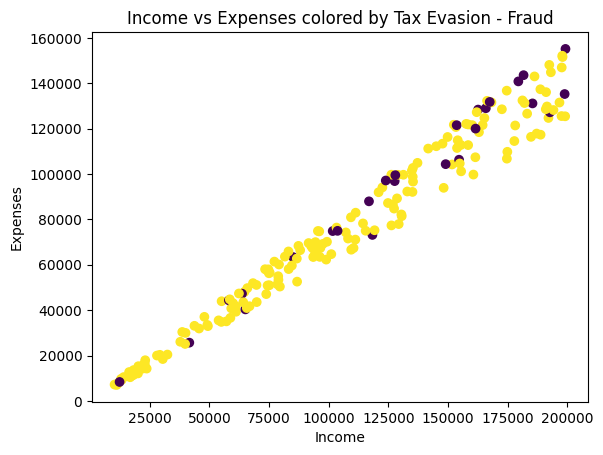

Further analysis can be done based on these initial insights.


In [150]:
plt.scatter(df_part["Income"], df_part["Expenses"], c=df_part["Tax Evasion - Fraud"], cmap="viridis")
plt.xlabel("Income")
plt.ylabel("Expenses")
plt.title("Income vs Expenses colored by Tax Evasion - Fraud")
plt.show()

print("Further analysis can be done based on these initial insights.")

# Create Fraud column using anomaly detection model

In [139]:
# Create Fraud column using anomaly detection model
from sklearn.svm import OneClassSVM

df_model_2 = df.drop(columns=['Tax Evasion - Fraud'])


# Select features for anomaly detection (consider Income, Expenses, Tax Liability)
features = ["Income", "Expenses", "Tax Liability"]
X = df_model_2[features]

# Train a One-Class SVM model for anomaly detection
model = OneClassSVM(nu=0.1)  # Adjust nu parameter based on desired outlier fraction
model.fit(X)

# Get anomaly scores (lower scores indicate higher anomaly likelihood)
anomaly_scores = model.decision_function(X)

# Define a threshold to classify anomalies (potential fraud) based on anomaly scores
threshold = -0.1  # Adjust threshold based on desired sensitivity

# Create a new column "Fraud" (0 - Not suspicious, 1 - Suspicious)
df_model_2["Tax Evasion - Fraud"] = 0
df_model_2.loc[anomaly_scores <= threshold, "Tax Evasion - Fraud"] = 1

# Save the data with the new "Fraud" column (optional)
#data.to_csv("data_with_fraud_one_class_svm.csv", index=False)

(df_model_2.head())  # View the first few rows with the new "Fraud" column


,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income,Tax Evasion - Fraud
0,91105.93,67629.19,7043.02,1,1,1,0
1,71916.93,46502.98,7624.18,0,0,0,0
2,28506.78,22240.21,1879.97,1,1,0,0
3,44391.41,31500.39,3867.31,0,1,1,0
4,12373.62,8288.47,1225.55,0,1,1,1


In [140]:
df_model_2['Tax Evasion - Fraud'].value_counts()

Tax Evasion - Fraud
0    9037
1     963
Name: count, dtype: int64

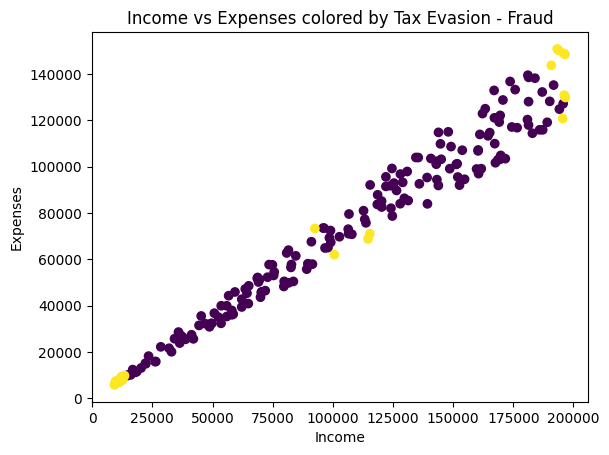

Further analysis can be done based on these initial insights.


In [151]:
df_part= df_model_2.iloc[:200]
plt.scatter(df_part["Income"], df_part["Expenses"], c=df_part["Tax Evasion - Fraud"], cmap="viridis")
plt.xlabel("Income")
plt.ylabel("Expenses")
plt.title("Income vs Expenses colored by Tax Evasion - Fraud")
plt.show()

print("Further analysis can be done based on these initial insights.")

# 1. Exploratory Data Analysis (EDA):
EDA helps us understand the dataset better and identify patterns or trends that could be useful for building the model.

     Income  Expenses  Tax Liability  Large Unexplained Purchases  \
0  91105.93  67629.19        7043.02                            1   
1  71916.93  46502.98        7624.18                            0   
2  28506.78  22240.21        1879.97                            1   
3  44391.41  31500.39        3867.31                            0   
4  12373.62   8288.47        1225.55                            0   

   Invoice Discrepancies  Unexplained Foreign Income  Tax Evasion - Fraud  
0                      1                           1                    0  
1                      0                           0                    0  
2                      1                           0                    0  
3                      1                           1                    0  
4                      1                           1                    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           

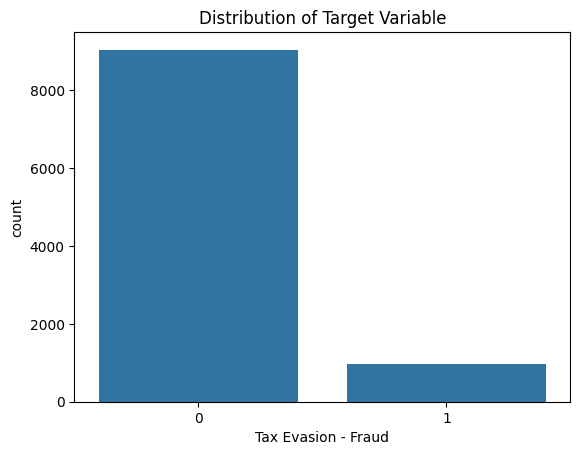

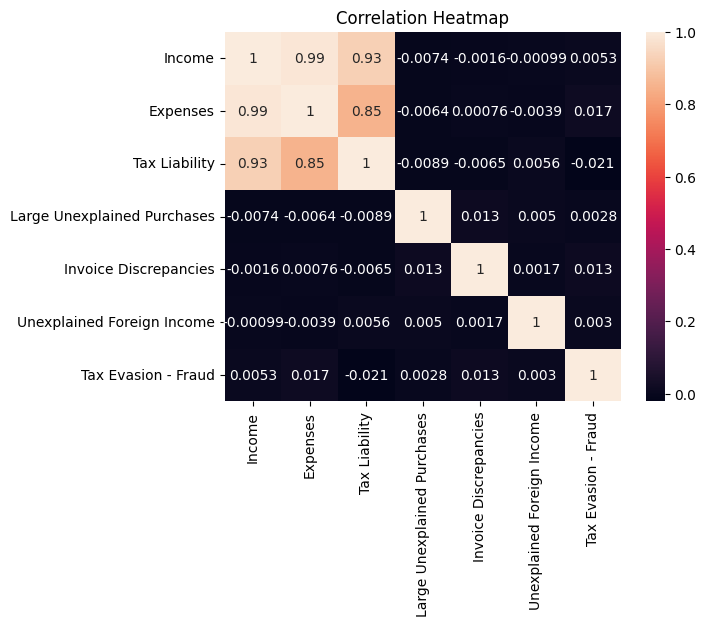

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = df_model_2.copy()

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Visualize target variable distribution
sns.countplot(x='Tax Evasion - Fraud', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize correlations
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


# 2. Data Preprocessing:
This includes handling missing values, encoding categorical variables, and scaling numerical features if necessary.

In [153]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('Tax Evasion - Fraud', axis=1)
y = data['Tax Evasion - Fraud']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 3. Model Selection and Training:
We'll use a Random Forest classifier for its robustness and ability to handle complex datasets.

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 4. Evaluation Metrics:
We'll use accuracy, precision, recall, F1-score, and ROC-AUC score for evaluating the model's performance. These metrics provide a comprehensive view of the model's effectiveness in detecting fraud.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.991
Precision: 0.9659090909090909
Recall: 0.9340659340659341
F1 Score: 0.9497206703910613
ROC-AUC Score: 0.9653828020164653


In [157]:
import pickle

# Save the trained model
model_path = "trained_model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

# Create a new dataset for testing the production model

In [160]:
import random
import pandas as pd

# Define a function to generate random income within a realistic range
def generate_income(min_income=5000, max_income=400000):
  return round(random.uniform(min_income, max_income), 2)

# Define a function to generate random expenses within a range based on income
def generate_expenses(income):
  expense_ratio = random.uniform(0.6, 0.8)  # Reasonable expense to income ratio
  return round(income * expense_ratio, 2)

# Define a function to generate random tax liability based on income and deductions
def generate_tax_liability(income, expenses, tax_rate=0.3):
  taxable_income = income - expenses
  return round(taxable_income * tax_rate, 2)

def generate_data(num_records=1000):
  data = []
  for _ in range(num_records):
    income = generate_income()
    expenses = generate_expenses(income)
    tax_liability = generate_tax_liability(income, expenses)

    # Generate random flags for potential fraud indicators (replace with your specific indicators)
    large_unexplained_purchases = random.randint(0, 1)  # 0 - No, 1 - Yes
    invoice_discrepancies = random.randint(0, 1)  # 0 - No, 1 - Yes
    unexplained_foreign_income = random.randint(0, 1)  # 0 - No, 1 - Yes

    data.append({
      "Income": income,
      "Expenses": expenses,
      "Tax Liability": tax_liability,
      "Large Unexplained Purchases": large_unexplained_purchases,
      "Invoice Discrepancies": invoice_discrepancies,
      "Unexplained Foreign Income": unexplained_foreign_income
    })
  return data

if __name__ == "__main__":
  synthetic_data = generate_data()
  df = pd.DataFrame(synthetic_data)

df.to_csv("./Test_Dataset.csv", index= False)  
df.head()

,Income,Expenses,Tax Liability,Large Unexplained Purchases,Invoice Discrepancies,Unexplained Foreign Income
0,87991.81,67712.13,6083.90,1,0,0
1,117129.25,87838.19,8787.32,1,0,1
2,324518.57,208175.63,34902.88,1,1,1
3,56045.12,42852.57,3957.77,1,0,1
4,23448.19,18756.73,1407.44,0,1,0
